# 🏞 Convolutional Neural Network

In this notebook, we'll walk through the steps required to train your own convolutional neural network (CNN) on the CIFAR dataset

In [24]:
import numpy as np

from tensorflow.keras import layers, models, optimizers, utils, datasets, callbacks
from notebooks.utils import display

## 0. Parameters <a name="parameters"></a>

In [25]:
NUM_CLASSES = 10

## 1. Prepare the Data <a name="prepare"></a>

In [26]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [27]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

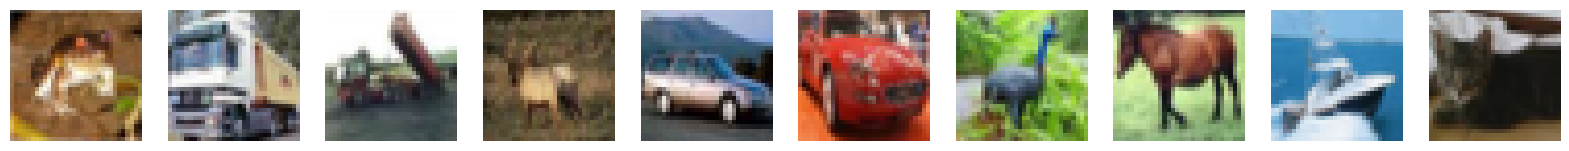

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [28]:
display(x_train[:10])
print(y_train[:10])

## 2. Build the model <a name="build"></a>

In [29]:
input_layer = layers.Input((32, 32, 3))

x = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(
    input_layer
)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate=0.5)(x)

x = layers.Dense(NUM_CLASSES)(x)
output_layer = layers.Activation("softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                           

## 3. Train the model <a name="train"></a>

In [38]:
# Setup for Tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=x_train, 
          y=y_train, 
          batch_size=32,
          epochs=10, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0351 - accuracy: 0.9880 - val_loss: 0.0667 - val_accuracy: 0.9811
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0297 - accuracy: 0.9897 - val_loss: 0.0756 - val_accuracy: 0.9798
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0286 - accuracy: 0.9905 - val_loss: 0.0725 - val_accuracy: 0.9814
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0244 - accuracy: 0.9920 - val_loss: 0.0756 - val_accuracy: 0.9821
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0228 - accuracy: 0.9917 - val_loss: 0.0820 - val_accuracy: 0.9813
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0205 - accuracy: 0.9928 - val_loss: 0.0968 - val_accuracy: 0.9797
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0187 - accuracy: 0.9935 - val_loss: 0.0700 - val_acc

In [7]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [21]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(x_test, y_test),
)

Epoch 1/10
 115/1563 [=>............................] - ETA: 18s - loss: 0.5623 - accuracy: 0.7978

2023-09-30 19:11:53.742374: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-09-30 19:11:53.742411: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-09-30 19:11:53.742488: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:133] cuptiGetTimestamp: ignored due to a previous error.
2023-09-30 19:11:53.742499: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:184] cuptiSubscribe: ignored due to a previous error.
2023-09-30 19:11:53.742502: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:457] cuptiGetResultString: ignored due to a previous error.
2023-09-30 19:11:53.742506: E tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1715] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error 


 198/1563 [==>...........................] - ETA: 16s - loss: 0.5569 - accuracy: 0.8000

2023-09-30 19:11:54.953448: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2023-09-30 19:11:54.954222: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:140] cuptiFinalize: ignored due to a previous error.
2023-09-30 19:11:54.954253: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:457] cuptiGetResultString: ignored due to a previous error.
2023-09-30 19:11:54.954262: E tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1807] function cupti_interface_->Finalize()failed with error 
2023-09-30 19:11:55.049821: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:133] cuptiGetTimestamp: ignored due to a previous error.
2023-09-30 19:11:55.049873: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:133] cuptiGetTimestamp: ignored due to a previous error.
2023-09-30 19:11:55.049884: I tensorflow/core/profiler/backends/gpu/cupti_collector.cc:521]  GpuTracer has collected 0 callback api events and 0 a

 209/1563 [===>..........................] - ETA: 21s - loss: 0.5550 - accuracy: 0.8016

2023-09-30 19:11:55.571185: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: my_logs/run_2023_09_30_19_10_22/plugins/profile/2023_09_30_19_11_55

2023-09-30 19:11:55.586385: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to my_logs/run_2023_09_30_19_10_22/plugins/profile/2023_09_30_19_11_55/6d72457d7092.memory_profile.json.gz
2023-09-30 19:11:55.618892: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: my_logs/run_2023_09_30_19_10_22/plugins/profile/2023_09_30_19_11_55
Dumped tool data for xplane.pb to my_logs/run_2023_09_30_19_10_22/plugins/profile/2023_09_30_19_11_55/6d72457d7092.xplane.pb
Dumped tool data for overview_page.pb to my_logs/run_2023_09_30_19_10_22/plugins/profile/2023_09_30_19_11_55/6d72457d7092.overview_page.pb
Dumped tool data for input_pipeline.pb to my_logs/run_2023_09_30_19_10_22/plugins/profile/2023_09_30_19_11_55/6d72457d7092.input_pipelin

1563/1563 [==============================] - 23s 15ms/step - loss: 0.5929 - accuracy: 0.7920 - val_loss: 0.8602 - val_accuracy: 0.7189
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5683 - accuracy: 0.7991 - val_loss: 0.8529 - val_accuracy: 0.7199
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.5400 - accuracy: 0.8113 - val_loss: 0.8088 - val_accuracy: 0.7307
Epoch 4/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.5254 - accuracy: 0.8145 - val_loss: 0.9017 - val_accuracy: 0.7111
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.4979 - accuracy: 0.8237 - val_loss: 0.8916 - val_accuracy: 0.7115
Epoch 6/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.4804 - accuracy: 0.8290 - val_loss: 0.8627 - val_accuracy: 0.7273
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.4594 - accuracy: 0.8370 - val_loss: 0.8532 - val_accura

## 4. Evaluation <a name="evaluate"></a>

In [13]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 1s 25ms/step - loss: 0.7817 - accuracy: 0.7268


[0.781686007976532, 0.7268000245094299]

In [14]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 1s 3ms/step


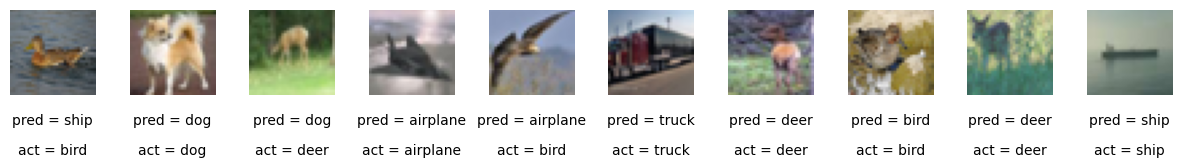

In [15]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)

In [31]:
%load_ext tensorboard

In [33]:
import tensorflow as tf
import datetime

In [34]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='layers_flatten'),
    tf.keras.layers.Dense(512, activation='relu', name='layers_dense'),
    tf.keras.layers.Dropout(0.2, name='layers_dropout'),
    tf.keras.layers.Dense(10, activation='softmax', name='layers_dense_2')
  ])

11490434/11490434 [==============================] - 0s 0us/step


In [35]:
model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2179 - accuracy: 0.9360 - val_loss: 0.1023 - val_accuracy: 0.9702
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0950 - accuracy: 0.9714 - val_loss: 0.0842 - val_accuracy: 0.9734
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0702 - accuracy: 0.9779 - val_loss: 0.0742 - val_accuracy: 0.9776
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0517 - accuracy: 0.9835 - val_loss: 0.0688 - val_accuracy: 0.9786
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0436 - accuracy: 0.9854 - val_loss: 0.0654 - val_accuracy: 0.9800


In [36]:
%tensorboard --logdir logs/fit